# First visualization
## Which song has higher chance of bigger hit based on the weeks on rank (track)

Using multiple linear regression, find the relatiship between each features and the track

In [9]:
# import necessary library
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats

%matplotlib inline
plt.style.use('seaborn')

In [2]:
# open csv file that will be used
df_00 = pd.read_csv('data/df_00.csv')
df_10 = pd.read_csv('data/df_10.csv')

In [3]:
df_10.head()

,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Features
0,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,77,50,20,2016-07-23,2016-02-02,"Canada,Pop",NaN
1,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,66,50,19,2016-07-16,2016-02-02,"Canada,Pop",NaN
2,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,58,50,18,2016-07-09,2016-02-02,"Canada,Pop",NaN
3,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,52,50,17,2016-07-02,2016-02-02,"Canada,Pop",NaN
4,Wild Things,Alessia Cara,0.741,0.626,1,-4.826,0,0.0886,0.02,0.0,...,41.18681,10,1,51,50,16,2016-06-25,2016-02-02,"Canada,Pop",NaN


In [5]:
df_10.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,Weekly.rank,Peak.position,Weeks.on.chart
count,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000,61126.000000
mean,0.630452,0.680841,5.370448,-5.923614,0.671155,0.094333,0.168215,0.020590,0.177002,0.483900,122.314437,224554.002421,3.980319,38.997759,10.034895,0.929866,48.669470,32.566437,12.544335
std,0.141967,0.173342,3.604804,2.490379,0.469798,0.095084,0.216854,0.118153,0.137641,0.217227,28.610550,44863.177084,0.233172,17.512736,2.444705,0.255375,28.811307,27.864664,10.265445
min,0.121000,0.009660,0.000000,-32.248000,0.000000,0.022500,0.000006,0.000000,0.016700,0.022400,48.718000,59387.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000
25%,0.544000,0.568000,2.000000,-6.914000,0.000000,0.036800,0.020500,0.000000,0.095300,0.322000,99.679000,199480.000000,4.000000,27.813740,8.000000,1.000000,23.000000,6.000000,5.000000
50%,0.638000,0.708000,6.000000,-5.522000,1.000000,0.052100,0.074500,0.000000,0.120000,0.476000,122.021000,219043.000000,4.000000,34.798000,10.000000,1.000000,48.000000,27.000000,10.000000
75%,0.730000,0.813000,8.000000,-4.393000,1.000000,0.106000,0.227000,0.000016,0.211000,0.647000,140.253000,240400.000000,4.000000,45.562910,11.000000,1.000000,73.000000,55.000000,17.000000
max,0.980000,0.991000,11.000000,-0.716000,1.000000,0.733000,0.992000,0.973000,0.979000,0.976000,208.067000,726947.000000,5.000000,213.154990,24.000000,1.000000,100.000000,100.000000,87.000000


MemoryError: Unable to allocate 27.8 GiB for an array with shape (61126, 61126) and data type int64

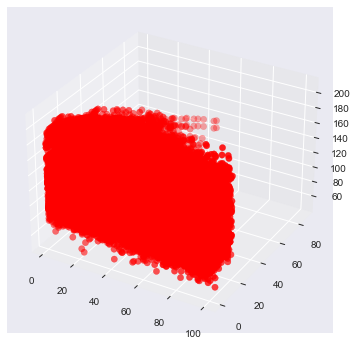

In [10]:
ax = plt.figure(figsize=(8, 6)).add_subplot(111, projection='3d')
ax.scatter(df_10['Weekly.rank'], df_10['Weeks.on.chart'], df_10['tempo'],
           depthshade=True, s=40, color='#ff0000')
# create x,y
xx, yy = np.meshgrid(df_10['Weekly.rank'], df_10['Weeks.on.chart'])

# calculate corresponding z
z = 4.3825 * xx + 2.4693 * yy - 255.5434

# plot the surface
ax.plot_surface(xx, yy, z, alpha=0.01, color='#00ff00')

ax.view_init(30, azim=240)
# ax.set_xlabel('Temperature ($\degree$ F)')
# ax.set_ylabel('Humidity (%)')
# ax.set_zlabel('Height (cm)')
# plt.title('Corn plant height as a function of temperature and humidity');